In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.imputation.mice as mice
sns.set()
sns.set_palette("deep")
qualitative_colors = sns.color_palette("RdBu", 12,desat=.7)
sns.palplot(qualitative_colors)

In [10]:
df = pd.read_csv('../02_data/BlackFriday.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [12]:
df.Purchase = df.Purchase.astype('float64',inplace=True)

In [13]:
df.Product_Category_2.isnull().sum()/len(df.Product_Category_2)

0.3106271287648095

In [14]:
def null_percentage(frame,col_list):
    for col in col_list:
        print(str(col),frame[col].isnull().sum()/len(frame[col]))
    

In [15]:
null_percentage(df,['Product_Category_2','Product_Category_3'])

Product_Category_2 0.3106271287648095
Product_Category_3 0.6944102891306734


In [16]:
df.shape

(537577, 12)

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664.0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196.0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172.0
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875.0


In [19]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [20]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


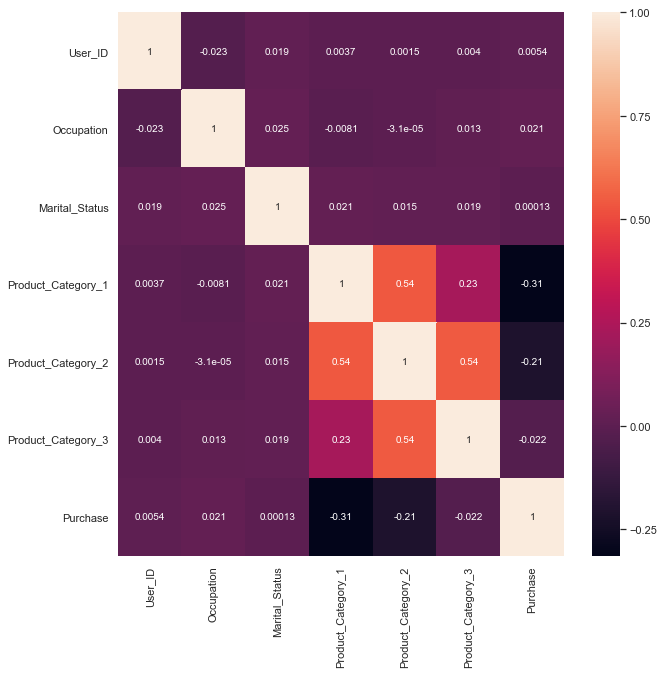

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(
    df.corr(),
    annot=True,
)

In [22]:
len(df.User_ID.unique())

5891

In [23]:
def print_unique(frame,col_list):
    for col in col_list:
        print(str(col),len(frame[col].unique()))

In [24]:
print_unique(df,['User_ID','Product_ID'])

User_ID 5891
Product_ID 3623


/Users/daniel/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daniel/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


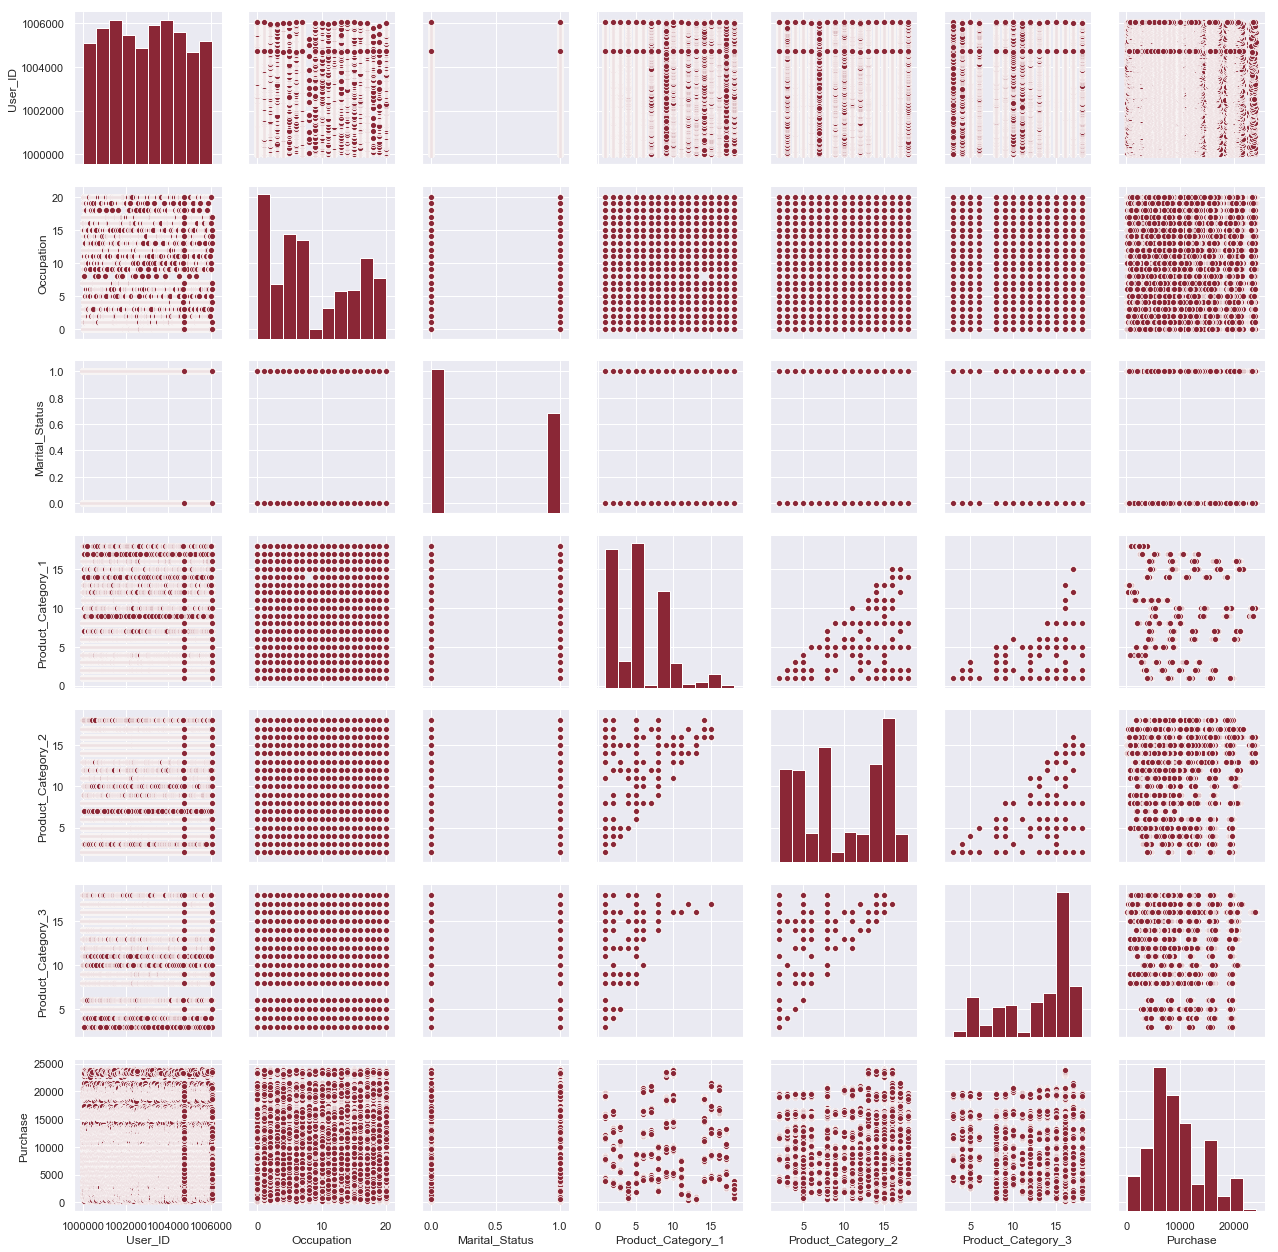

In [25]:
sns.set_palette(qualitative_colors)
sns.pairplot(df)

In [26]:
df.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

Text(0.5, 0, 'Subtotal Count')

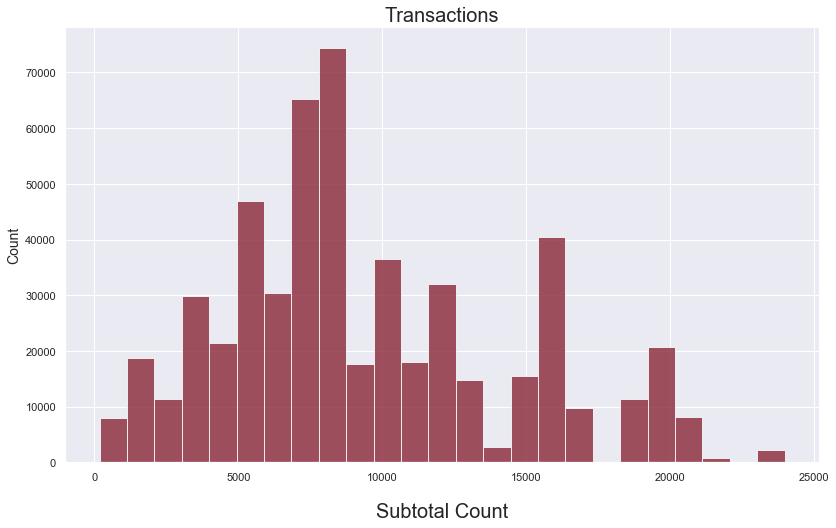

In [27]:
sns.set_palette(qualitative_colors)
plt.figure(figsize=(13.5,8))
plt.hist(df['Purchase'],bins=25, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Transactions',fontsize=(20))
plt.xlabel('Subtotal Count',fontsize=20,labelpad=20)

In [28]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

Text(0.5, 0, 'Gender')

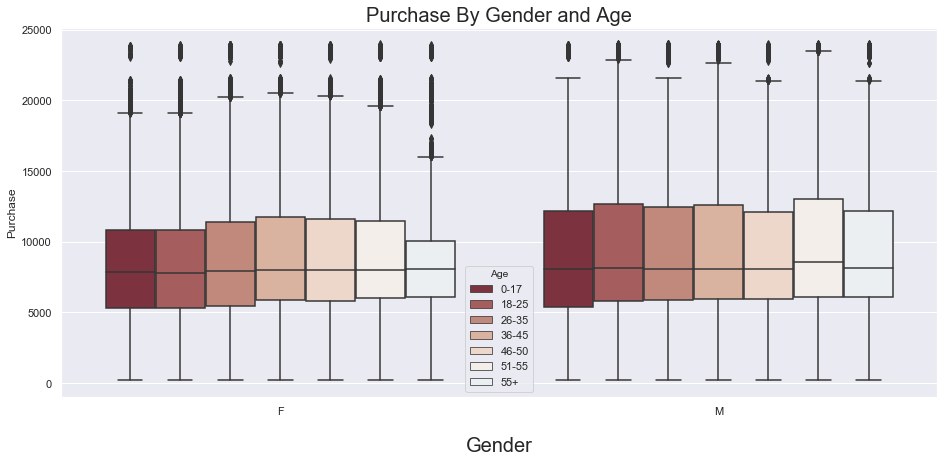

In [29]:
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.figure(figsize=(15.7,6.8))
sns.set_palette(qualitative_colors)
sns.boxplot(x='Gender',y='Purchase',hue='Age',data=df,hue_order=age_order)
plt.title('Purchase By Gender and Age',fontsize=20)
plt.xlabel('Gender',fontsize=20,labelpad=20)

Text(0.5, 0, 'Gender')

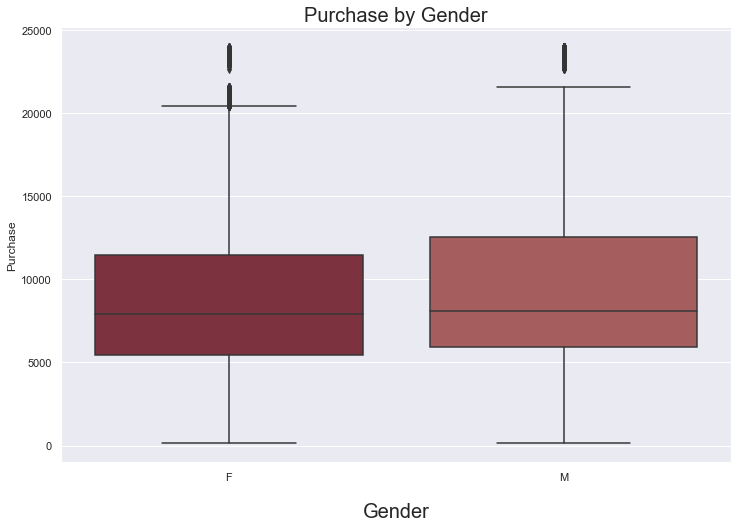

In [30]:
sns.set_palette(qualitative_colors)
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.title('Purchase by Gender',fontsize=20)
plt.xlabel('Gender',fontsize=20,labelpad=20)

Text(0.5, 0, 'City Category')

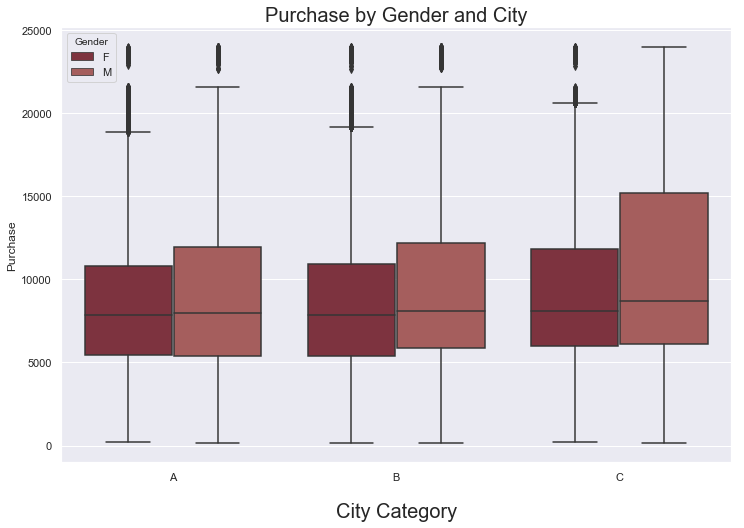

In [31]:
plt.figure(figsize=(12,8))
sns.set_palette(qualitative_colors)
sns.boxplot(x='City_Category',y='Purchase',hue='Gender',data=df,order=['A','B','C'])
plt.title('Purchase by Gender and City',fontsize=20)
plt.xlabel('City Category',fontsize=20,labelpad=20)

Text(0.5, 0, 'Product_Category_1')

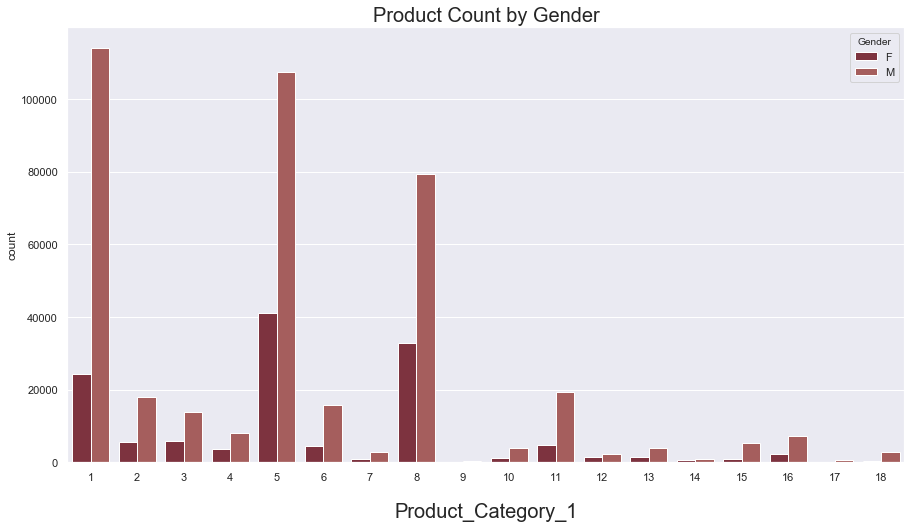

In [32]:
plt.figure(figsize=(15,8))
sns.set_palette(qualitative_colors)
sns.countplot(x="Product_Category_1", hue="Gender", data=df,orient='v')
plt.title('Product Count by Gender',fontsize=20)
plt.xlabel('Product_Category_1',fontsize=20,labelpad=20)

In [33]:
purchase_sum_gender_product = df.groupby('Product_Category_1').agg({'Purchase':np.sum})

In [34]:
purchase_sum_gender_product.sort_values('Purchase', ascending=False,inplace=True)

In [35]:
purchase_sum_gender_product.head(3)

,Purchase
Product_Category_1,
1,1.882666e+09
5,9.269175e+08
8,8.406934e+08


Text(0.5, 0, 'Product Number')

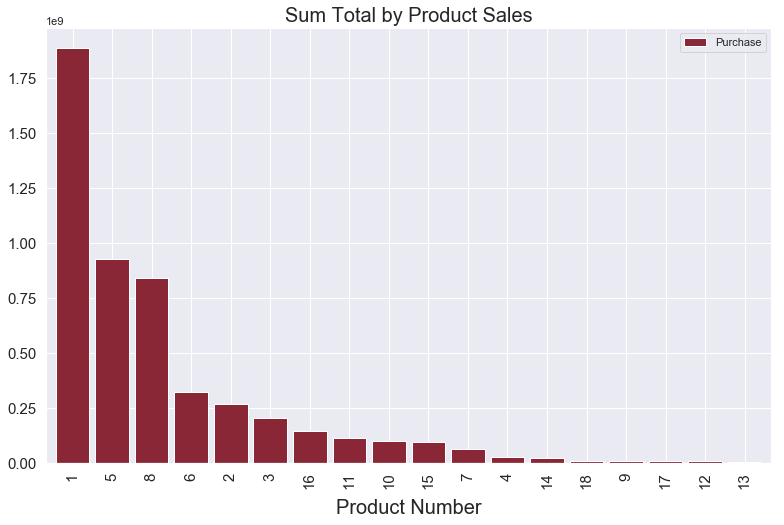

In [36]:
purchase_sum_gender_product.plot(kind='bar'
                                 ,figsize=(13,8)
                                 ,fontsize=15
                                ,width=.85)
plt.title(fontsize=20,label='Sum Total by Product Sales')
plt.xlabel('Product Number',fontsize=20,labelpad=10)


Text(0.5, 0, 'Age')

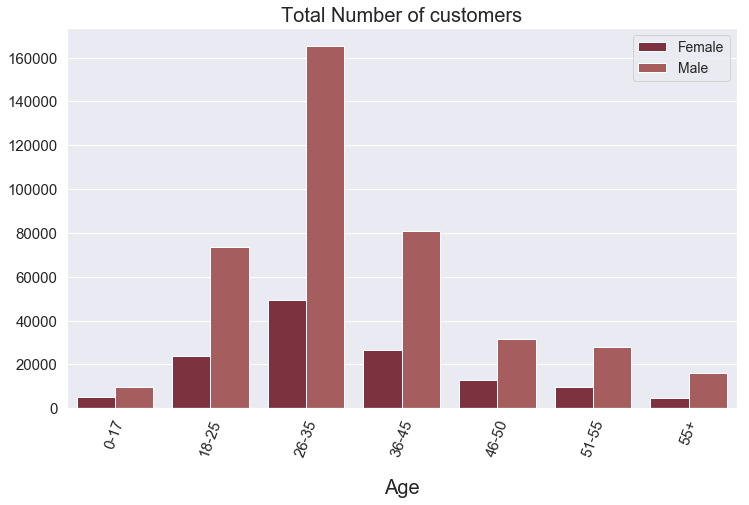

In [37]:
plt.figure(figsize=(12,7))
sns.countplot('Age',hue='Gender',data=df,order=age_order)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total Number of customers',fontsize=20)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.xlabel('Age',fontsize=20,labelpad=20)

In [38]:
age_gender_sumtotals = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()

Text(0.5, 0, 'Age')

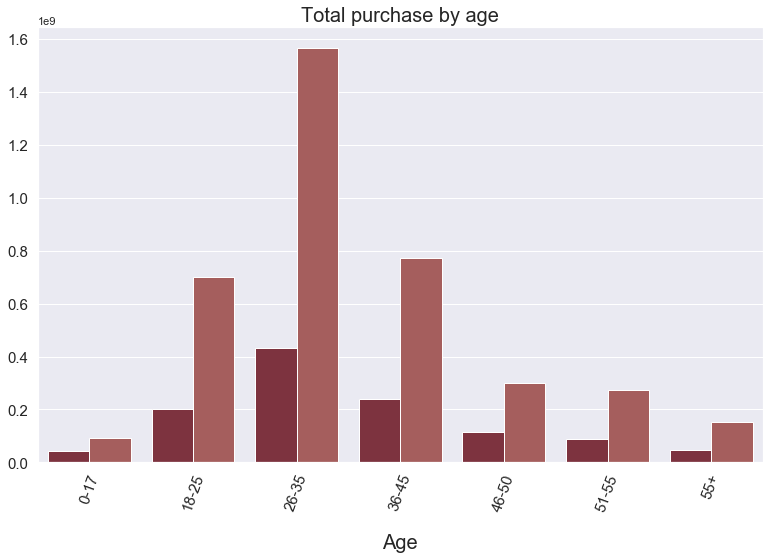

In [39]:
plt.figure(figsize=(13,8))
sns.barplot('Age','Purchase',hue='Gender',data=age_gender_sumtotals)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase by age',fontsize=20)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.xlabel('Age',fontsize=20,labelpad=20)

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


In [41]:
df.Purchase.count()

537577

In [42]:
avg_purch_df = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()

Text(0.5, 0, 'Age')

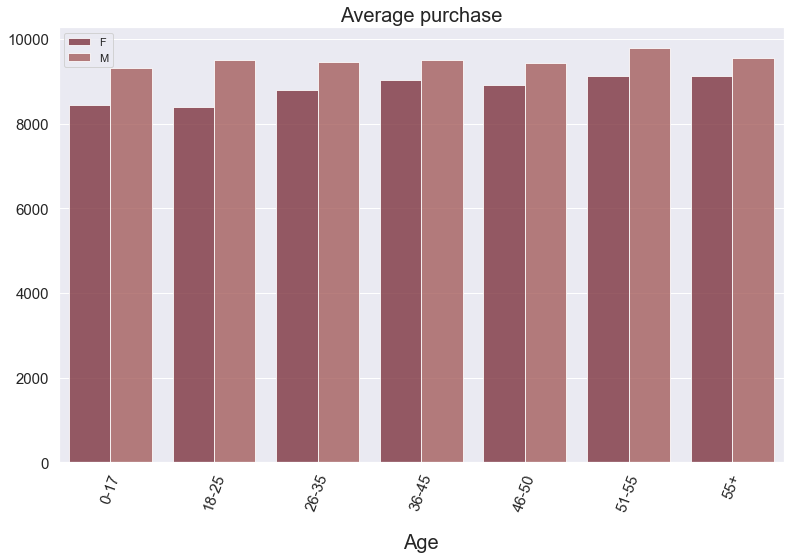

In [43]:
plt.figure(figsize=(13,8))
sns.barplot('Age','Purchase',hue='Gender',data=avg_purch_df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=20)
plt.legend()
plt.tick_params(labelsize=15)
plt.xlabel('Age',fontsize=20,labelpad=20)

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


In [45]:
purchase_total_cities = df.groupby(['City_Category','Gender']).agg({'Purchase':np.sum}).reset_index()

Text(0.5, 0, 'City Category')

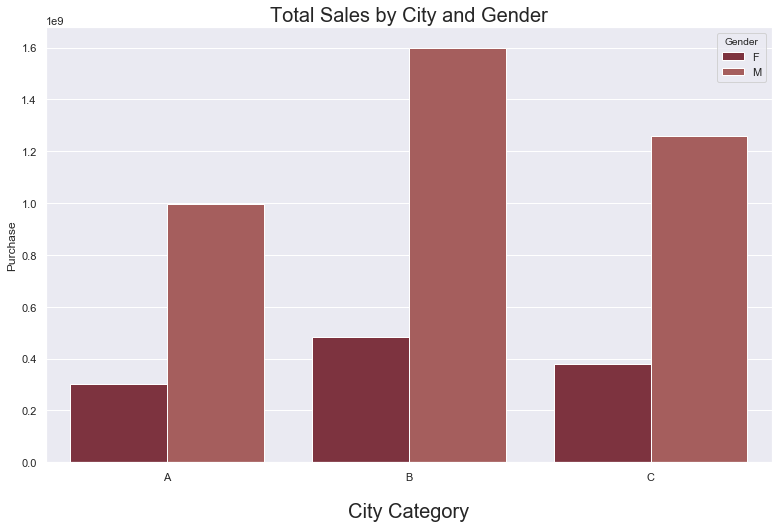

In [46]:
plt.figure(figsize=(13,8))
sns.barplot('City_Category','Purchase',hue='Gender',data= purchase_total_cities)
plt.title('Total Sales by City and Gender',fontsize=(20))
plt.xlabel('City Category',fontsize=20,labelpad=20)

In [47]:
cities_totals_by_age = df.groupby(['City_Category','Age']).agg({'Purchase':np.sum}).reset_index()

Text(0.5, 0, 'City Category')

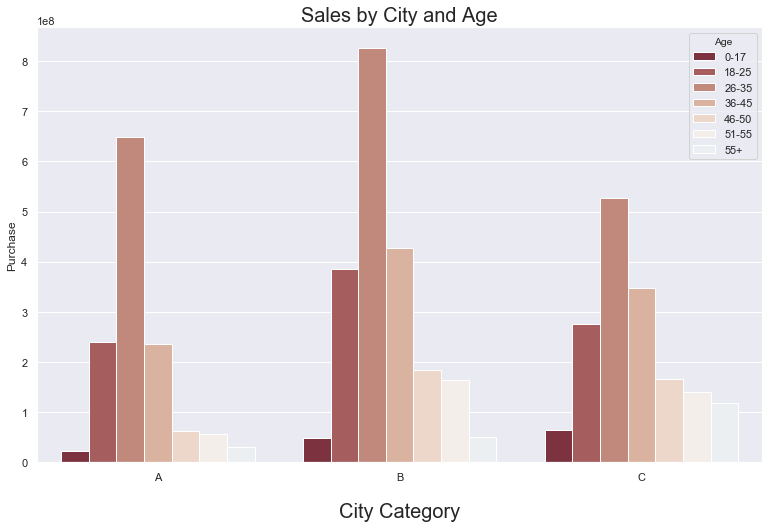

In [48]:
plt.figure(figsize=(13,8))
sns.barplot('City_Category','Purchase',hue='Age',data=cities_totals_by_age)
plt.title('Sales by City and Age',fontsize=(20))
plt.xlabel('City Category',fontsize=20,labelpad=20)

In [49]:
purchase_by_city_product = df.groupby(['City_Category','Product_Category_1']).agg({'Purchase':np.mean}).reset_index()

Text(0.5, 0, 'City Category')

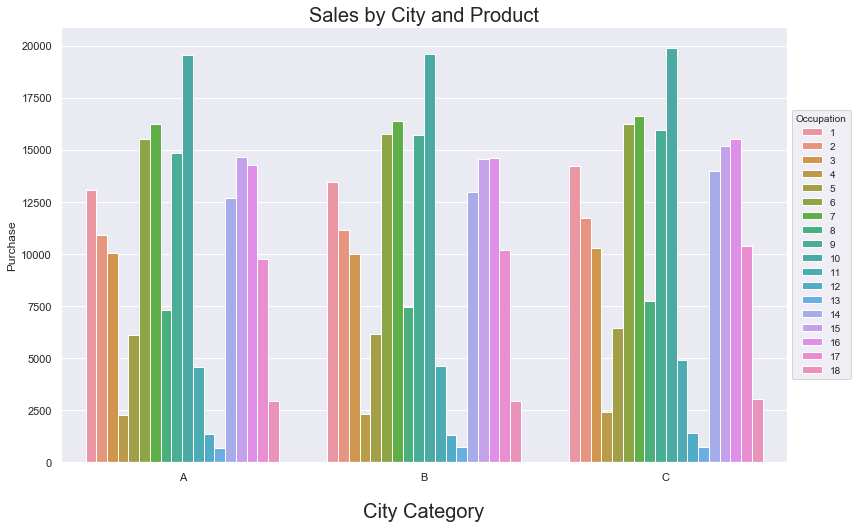

In [50]:
plt.figure(figsize=(13,8))
sns.barplot('City_Category','Purchase',hue='Product_Category_1',data=purchase_by_city_product)
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Sales by City and Product',fontsize=20)
plt.xlabel('City Category',fontsize=20,labelpad=20)

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


In [52]:
city_age_gender_total_df = df.groupby(['Gender','Age','City_Category']).agg({'Purchase':np.sum})

In [53]:
city_age_gender_total_df.sort_values(['City_Category','Gender'], ascending=True,inplace=True)

Text(0.5, 0, 'Age, Gender, City')

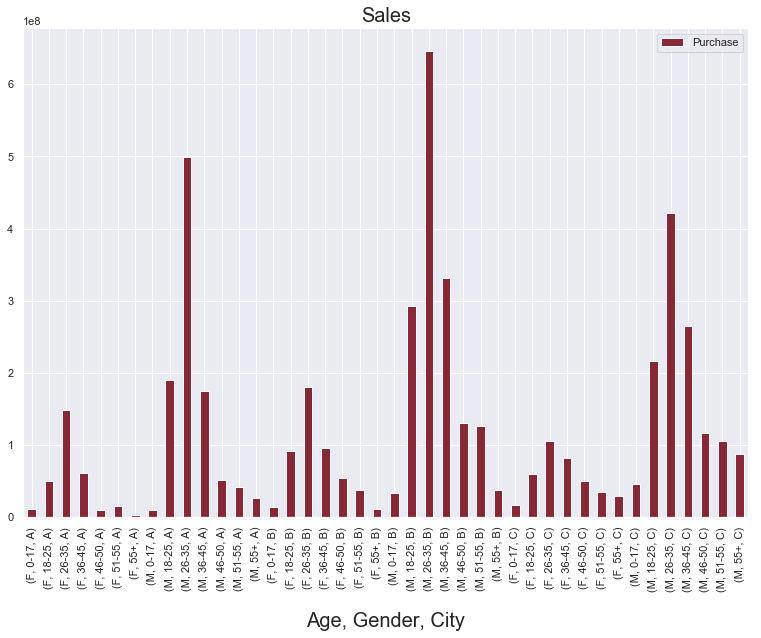

In [54]:
city_age_gender_total_df.plot(kind='bar',figsize=(13,9))
plt.title('Sales',fontsize=20)
plt.xlabel('Age, Gender, City',fontsize=20,labelpad=20)

Text(0.5, 0, 'City Category')

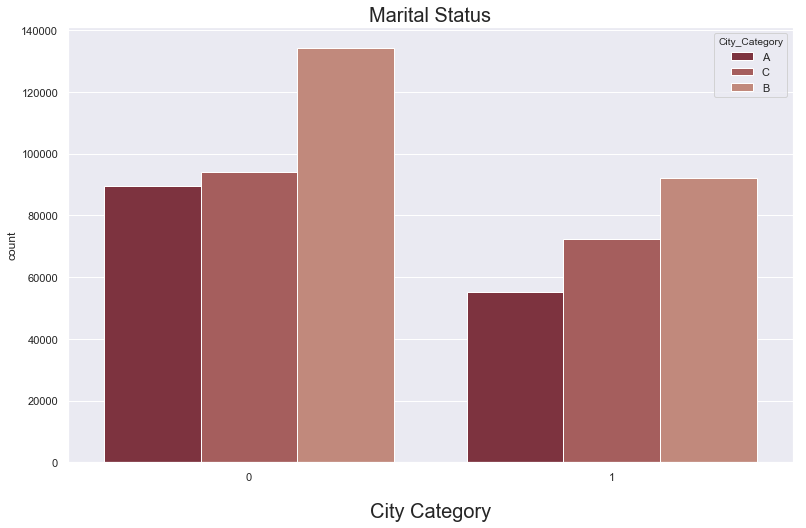

In [55]:
plt.figure(figsize=(13,8))
sns.countplot('Marital_Status',hue='City_Category',data=df)
plt.title('Marital Status',fontsize=20)
plt.xlabel('City Category',fontsize=20,labelpad=20)

In [56]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


In [57]:
count_of_product_id_marital = (df.groupby(['Age','Marital_Status'])
                              .agg({'Purchase':'sum'})
                              .reset_index())

Text(0.5, 0, 'Age')

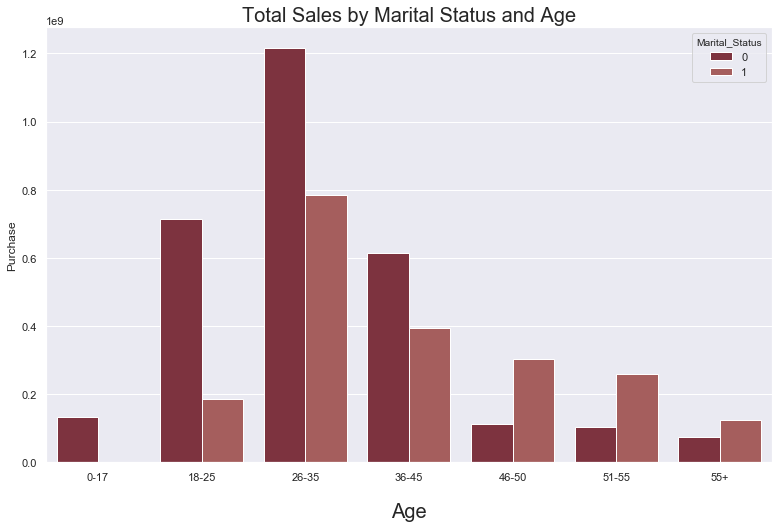

In [58]:
plt.figure(figsize=(13,8))
sns.barplot('Age','Purchase',
            hue='Marital_Status',
            data=count_of_product_id_marital)
plt.title('Total Sales by Marital Status and Age',fontsize=20)
plt.xlabel('Age',fontsize=20,labelpad=20)

In [59]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
334227,1003507,P00124242,M,26-35,0,A,3,0,11,3016.0
